In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from nsepy import get_history
from datetime import datetime

sns.set_style('whitegrid')
%matplotlib inline

In [2]:
start = datetime(2021, 1, 1)
end = datetime(2021, 2, 28)
symbol="PNB"

data = get_history(symbol=symbol, start=start, end=end).round(2)
data.head()

,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
Date,,,,,,,,,,,,,,
2021-01-01,PNB,EQ,33.05,33.3,34.95,33.10,34.85,34.80,34.35,227528491,7.816446e+14,179492,71909145,0.32
2021-01-04,PNB,EQ,34.80,35.4,35.75,34.25,35.70,35.55,35.06,213599078,7.489692e+14,171956,47012629,0.22
2021-01-05,PNB,EQ,35.55,35.0,35.70,34.70,35.55,35.60,35.38,142225084,5.032279e+14,109539,26252121,0.18
2021-01-06,PNB,EQ,35.60,35.8,36.40,34.75,35.20,35.20,35.72,202327890,7.227796e+14,158327,41830023,0.21
2021-01-07,PNB,EQ,35.20,35.8,36.00,35.35,35.60,35.45,35.60,94883129,3.377554e+14,74528,27145885,0.29


In [3]:
#Drop colm & Show the data 
drop_columns = ['Symbol', 'Series', 'Turnover', 'Trades', 'Deliverable Volume', '%Deliverble']
data.drop(drop_columns, axis=1,inplace = True)
data.to_csv('tmp.csv')

In [4]:
df = pd.read_csv('tmp.csv', parse_dates=["Date"], index_col="Date") 
df.tail()

,Prev Close,Open,High,Low,Last,Close,VWAP,Volume
Date,,,,,,,,
2021-02-22,42.05,42.55,42.85,40.20,40.85,41.05,41.51,207909169
2021-02-23,41.05,41.30,42.20,40.65,41.15,41.00,41.49,217940163
2021-02-24,41.00,41.45,42.10,41.25,41.85,41.80,41.68,76642692
2021-02-25,41.80,42.25,42.65,41.75,42.05,41.90,42.20,133293103
2021-02-26,41.90,41.00,41.70,40.35,40.75,40.85,41.02,191695436


In [5]:
df['Opening High& Low'] = (df['Open']- df['Prev Close']).round(decimals = 2)
df['Day Result'] = (df['Close']- df['Open']).round(decimals = 2)

#df_data['Percentage'] = ((df_data['Diff'] * 100) / df_data['Open']).round(decimals = 2).astype(str) + '%'
df['Change'] = ((df['Day Result'] * 100) / df['Open']).round(decimals = 2)
df.tail()

,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Opening High& Low,Day Result,Change
Date,,,,,,,,,,,
2021-02-22,42.05,42.55,42.85,40.20,40.85,41.05,41.51,207909169,0.50,-1.50,-3.53
2021-02-23,41.05,41.30,42.20,40.65,41.15,41.00,41.49,217940163,0.25,-0.30,-0.73
2021-02-24,41.00,41.45,42.10,41.25,41.85,41.80,41.68,76642692,0.45,0.35,0.84
2021-02-25,41.80,42.25,42.65,41.75,42.05,41.90,42.20,133293103,0.45,-0.35,-0.83
2021-02-26,41.90,41.00,41.70,40.35,40.75,40.85,41.02,191695436,-0.90,-0.15,-0.37


In [6]:
# summarize the data
#df.describe().transpose()
#df.describe().transpose()[['mean', 'std']]
df.describe()

,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Opening High& Low,Day Result,Change
count,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,4.000000e+01,40.000000,40.000000,40.000000
mean,37.396250,37.625000,38.587500,36.698750,37.605000,37.591250,37.681750,1.921645e+08,0.228750,-0.033750,-0.029500
std,2.896248,2.941742,3.176632,2.824651,2.856096,2.858453,3.018127,9.932911e+07,0.339473,1.171586,3.067403
min,32.550000,33.000000,33.100000,31.900000,32.600000,32.550000,32.430000,6.978021e+07,-0.900000,-2.950000,-7.200000
25%,35.437500,35.762500,36.000000,34.662500,35.537500,35.450000,35.492500,1.275162e+08,0.125000,-0.712500,-1.877500
50%,36.550000,36.875000,37.450000,35.625000,36.775000,36.775000,36.650000,1.839185e+08,0.250000,-0.225000,-0.605000
75%,39.512500,39.625000,41.087500,39.025000,39.762500,39.700000,39.682500,2.146843e+08,0.450000,0.562500,1.567500
max,43.800000,44.250000,46.350000,41.800000,43.950000,43.800000,43.980000,4.665797e+08,0.800000,2.200000,5.930000


In [7]:
#df_data.loc[(df_data["Diff"] > 0)].values
df.loc[(df["Change"] > 0)]

,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Opening High& Low,Day Result,Change
Date,,,,,,,,,,,
2021-01-01,33.05,33.30,34.95,33.10,34.85,34.80,34.35,227528491,0.25,1.50,4.50
2021-01-04,34.80,35.40,35.75,34.25,35.70,35.55,35.06,213599078,0.60,0.15,0.42
2021-01-05,35.55,35.00,35.70,34.70,35.55,35.60,35.38,142225084,-0.55,0.60,1.71
2021-01-12,34.90,34.70,36.95,34.30,36.40,36.50,35.77,183664727,-0.20,1.80,5.19
2021-01-14,36.60,36.75,37.80,36.40,36.95,37.00,37.13,184172283,0.15,0.25,0.68
2021-01-19,35.45,35.95,36.75,35.50,36.65,36.50,36.09,109008869,0.50,0.55,1.53
2021-01-20,36.50,36.75,37.30,36.30,36.90,36.95,36.77,132227405,0.25,0.20,0.54
2021-01-29,32.55,33.00,34.40,32.50,33.50,33.35,33.14,125606644,0.45,0.35,1.06
2021-02-01,33.35,33.75,36.00,33.10,35.75,35.75,34.42,200145354,0.40,2.00,5.93


In [8]:
df.loc[ (df['Opening High& Low'] > 0) & (df['Day Result'] > 0) ]

,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Opening High& Low,Day Result,Change
Date,,,,,,,,,,,
2021-01-01,33.05,33.30,34.95,33.10,34.85,34.80,34.35,227528491,0.25,1.50,4.50
2021-01-04,34.80,35.40,35.75,34.25,35.70,35.55,35.06,213599078,0.60,0.15,0.42
2021-01-14,36.60,36.75,37.80,36.40,36.95,37.00,37.13,184172283,0.15,0.25,0.68
2021-01-19,35.45,35.95,36.75,35.50,36.65,36.50,36.09,109008869,0.50,0.55,1.53
2021-01-20,36.50,36.75,37.30,36.30,36.90,36.95,36.77,132227405,0.25,0.20,0.54
2021-01-29,32.55,33.00,34.40,32.50,33.50,33.35,33.14,125606644,0.45,0.35,1.06
2021-02-01,33.35,33.75,36.00,33.10,35.75,35.75,34.42,200145354,0.40,2.00,5.93
2021-02-02,35.75,36.10,36.85,35.55,36.10,36.20,36.20,199832087,0.35,0.10,0.28
2021-02-03,36.20,36.45,38.75,35.70,38.55,38.35,37.36,260980002,0.25,1.90,5.21


In [9]:
df.loc[(df["Change"] < 0) ]

,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Opening High& Low,Day Result,Change
Date,,,,,,,,,,,
2021-01-06,35.60,35.80,36.40,34.75,35.20,35.20,35.72,202327890,0.20,-0.60,-1.68
2021-01-07,35.20,35.80,36.00,35.35,35.60,35.45,35.60,94883129,0.60,-0.35,-0.98
2021-01-08,35.45,35.65,35.90,35.10,35.50,35.40,35.53,80655853,0.20,-0.25,-0.70
2021-01-11,35.40,35.80,35.80,34.55,34.90,34.90,35.03,76603154,0.40,-0.90,-2.51
2021-01-13,36.50,37.00,37.20,35.25,36.50,36.60,36.53,227452083,0.50,-0.40,-1.08
2021-01-15,37.00,37.00,37.50,35.50,35.90,35.95,36.50,142841953,0.00,-1.05,-2.84
2021-01-18,35.95,36.00,36.55,35.10,35.30,35.45,35.68,113003034,0.05,-0.55,-1.53
2021-01-21,36.95,37.10,37.40,35.25,35.90,35.65,36.53,126279607,0.15,-1.45,-3.91
2021-01-22,35.65,35.80,36.05,34.20,34.60,34.55,34.96,133649890,0.15,-1.25,-3.49


In [10]:
# another way to take column data
#open_data = df_data.iloc[:, 0].values
df_close = df.iloc[:, 5]
df_close.head()

Date
2021-01-01    34.80
2021-01-04    35.55
2021-01-05    35.60
2021-01-06    35.20
2021-01-07    35.45
Name: Close, dtype: float64

# What's the change in stock's price over time?

/Users/sonukumar/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 8377 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/sonukumar/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 8377 missing from current font.
  font.set_text(s, 0, flags=flags)


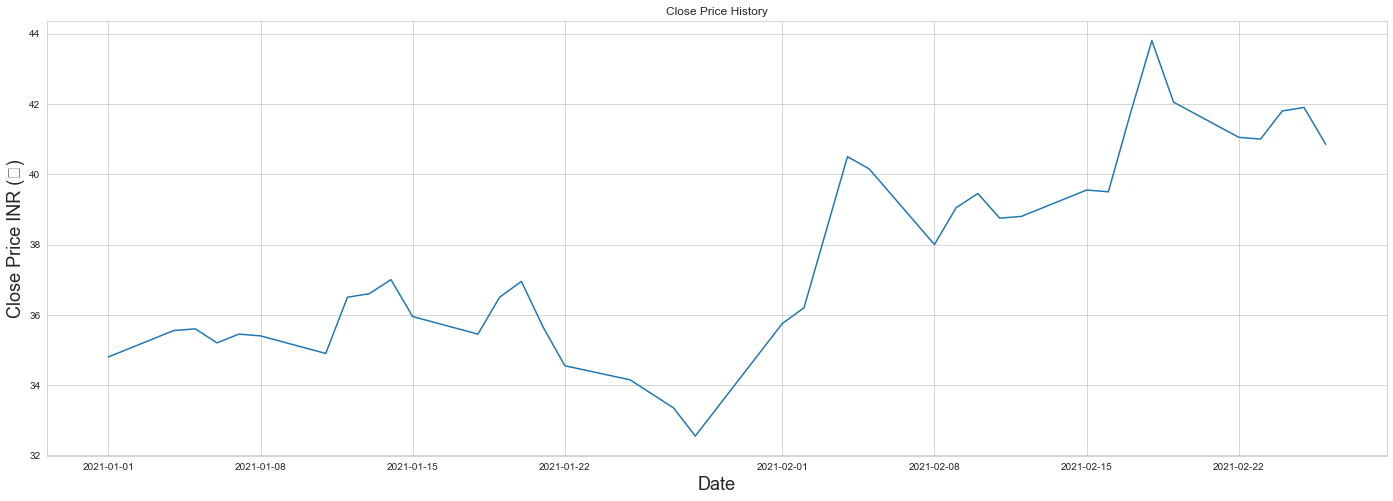

In [11]:
#Visualize the closing price history
plt.figure(figsize=(24,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price INR (₹)',fontsize=18)
plt.show()

<AxesSubplot:xlabel='Date'>

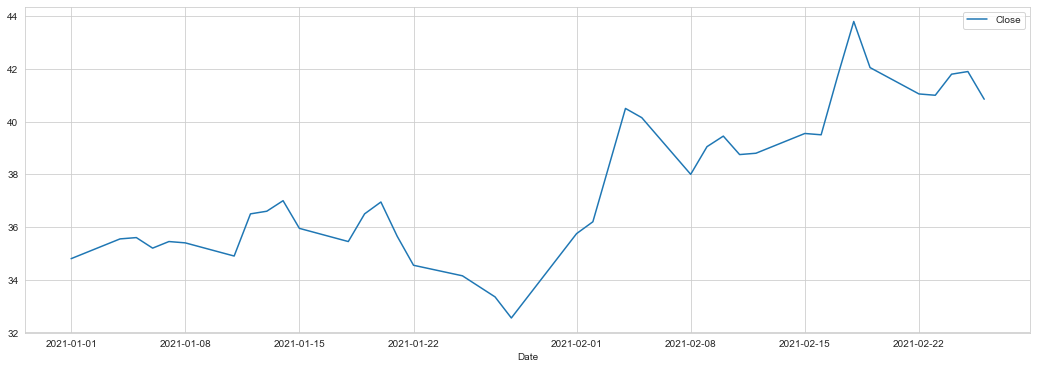

In [12]:
#Plotting the stock's adjusted closing price using pandas
data['Close'].plot(legend=True,figsize=(18,6))

<AxesSubplot:xlabel='Date'>

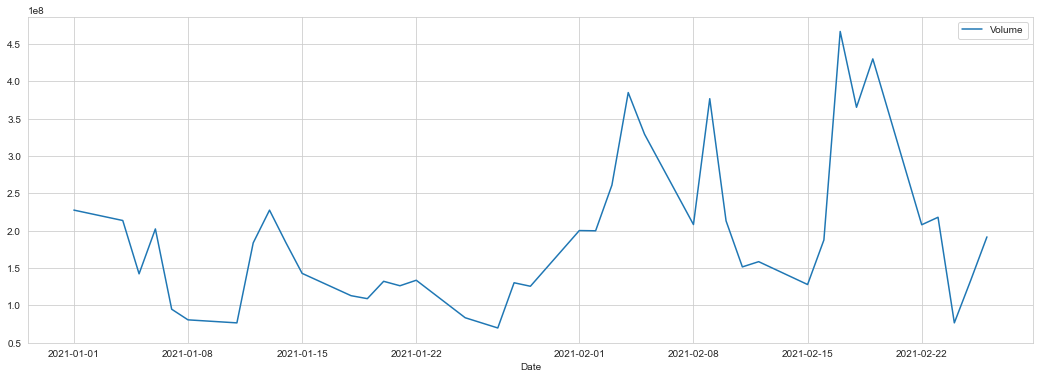

In [13]:
#Plotting the total volume being traded over time
data['Volume'].plot(legend=True,figsize=(18,6))

## What was the moving average of various stocks?

Let's check out the moving average for stocks over a 10, 20 and 50 day period of time. We'll add that information to the stock's dataframe.

In [14]:
ma_day = [14,28]

for ma in ma_day:
    column_name = "MA %s days" %(str(ma))
    
    data[column_name] = data['Close'].rolling(window=ma,center=False).mean()

In [15]:
data.tail()

,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,MA 14 days,MA 28 days
Date,,,,,,,,,,
2021-02-22,42.05,42.55,42.85,40.20,40.85,41.05,41.51,207909169,40.050000,37.667857
2021-02-23,41.05,41.30,42.20,40.65,41.15,41.00,41.49,217940163,40.239286,37.825000
2021-02-24,41.00,41.45,42.10,41.25,41.85,41.80,41.68,76642692,40.332143,37.996429
2021-02-25,41.80,42.25,42.65,41.75,42.05,41.90,42.20,133293103,40.457143,38.208929
2021-02-26,41.90,41.00,41.70,40.35,40.75,40.85,41.02,191695436,40.660714,38.401786


<AxesSubplot:xlabel='Date'>

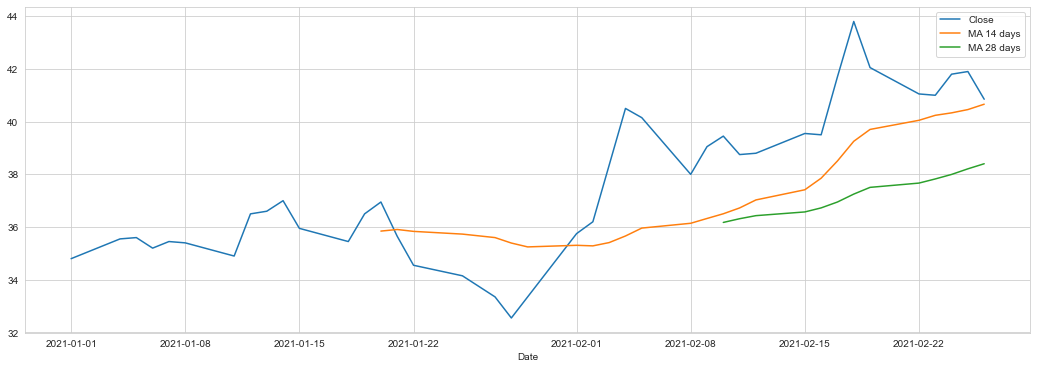

In [16]:
data[['Close','MA 14 days','MA 28 days']].plot(subplots=False,figsize=(18,6))

Moving averages for more days have a smoother plot, as they're less reliable on daily fluctuations. So even though, Apple's stock has a slight dip near the start of September, it's generally been on an upward trend since mid-July.

## What was the daily return average of a stock?

In [17]:
#The daily return column can be created by using the percentage change over the adjusted closing price
data['Daily Return'] = data['Close'].pct_change().round(2)

In [18]:
data['Daily Return'].tail()

Date
2021-02-22   -0.02
2021-02-23   -0.00
2021-02-24    0.02
2021-02-25    0.00
2021-02-26   -0.03
Name: Daily Return, dtype: float64

<AxesSubplot:xlabel='Date'>

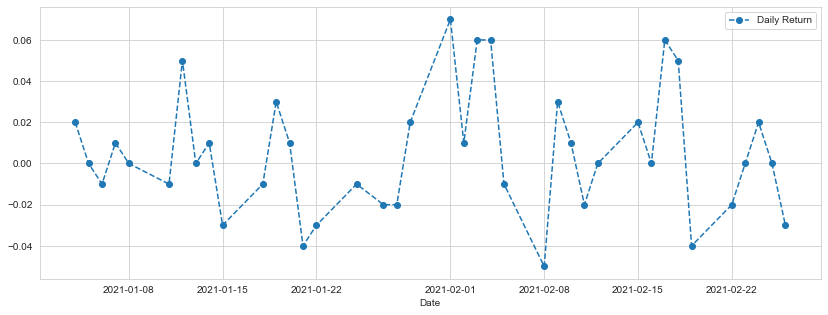

In [19]:
#Plotting the daily return
data['Daily Return'].plot(figsize=(14,5),legend=True,linestyle='--',marker='o')

In [20]:
data.tail()

,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,MA 14 days,MA 28 days,Daily Return
Date,,,,,,,,,,,
2021-02-22,42.05,42.55,42.85,40.20,40.85,41.05,41.51,207909169,40.050000,37.667857,-0.02
2021-02-23,41.05,41.30,42.20,40.65,41.15,41.00,41.49,217940163,40.239286,37.825000,-0.00
2021-02-24,41.00,41.45,42.10,41.25,41.85,41.80,41.68,76642692,40.332143,37.996429,0.02
2021-02-25,41.80,42.25,42.65,41.75,42.05,41.90,42.20,133293103,40.457143,38.208929,0.00
2021-02-26,41.90,41.00,41.70,40.35,40.75,40.85,41.02,191695436,40.660714,38.401786,-0.03


/Users/sonukumar/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Daily Return', ylabel='Density'>

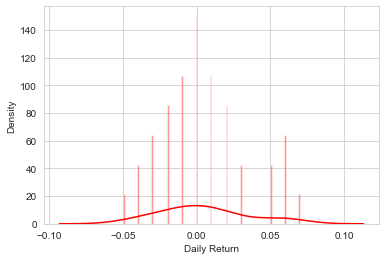

In [21]:
sns.distplot(data['Daily Return'].dropna(),bins=100,color='red')

Positive daily returns seem to be slightly more frequent than negative returns for PNB.

/Users/sonukumar/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Daily Return', ylabel='Density'>

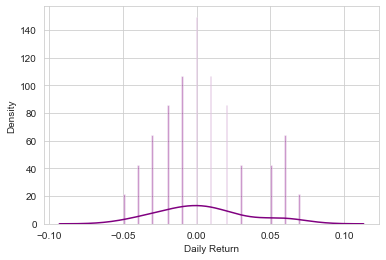

In [22]:
sns.distplot(data['Daily Return'].dropna(),bins=100,color='purple')

#To get the number of training days:

In [23]:
print("trainging days =", data.shape)

trainging days = (40, 11)


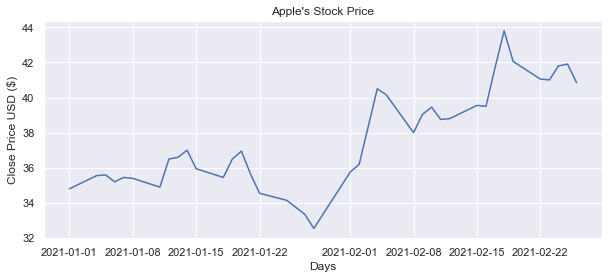

In [24]:
sns.set()
plt.figure(figsize=(10, 4))
plt.title("Apple's Stock Price")
plt.xlabel("Days")
plt.ylabel("Close Price USD ($)")
plt.plot(data["Close"])
plt.show()

In [25]:
apple = data[["Close"]]
print(apple.head())

            Close
Date             
2021-01-01  34.80
2021-01-04  35.55
2021-01-05  35.60
2021-01-06  35.20
2021-01-07  35.45


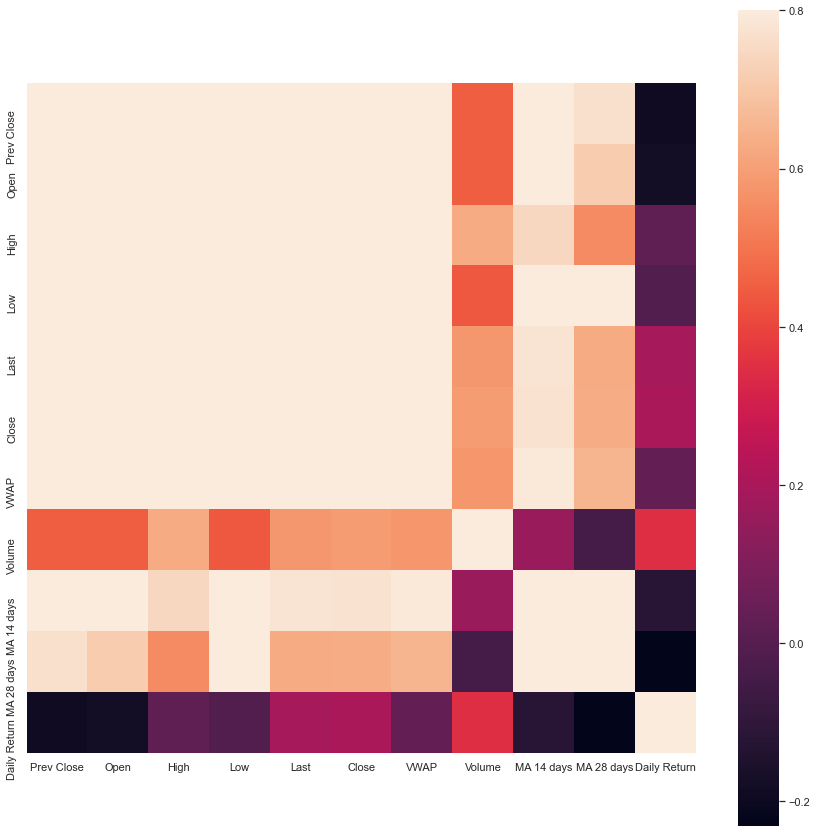

In [27]:
C_mat = data.corr()
fig = plt.figure(figsize = (15,15))
sns.heatmap(C_mat, vmax = .8, square = True)
plt.show()

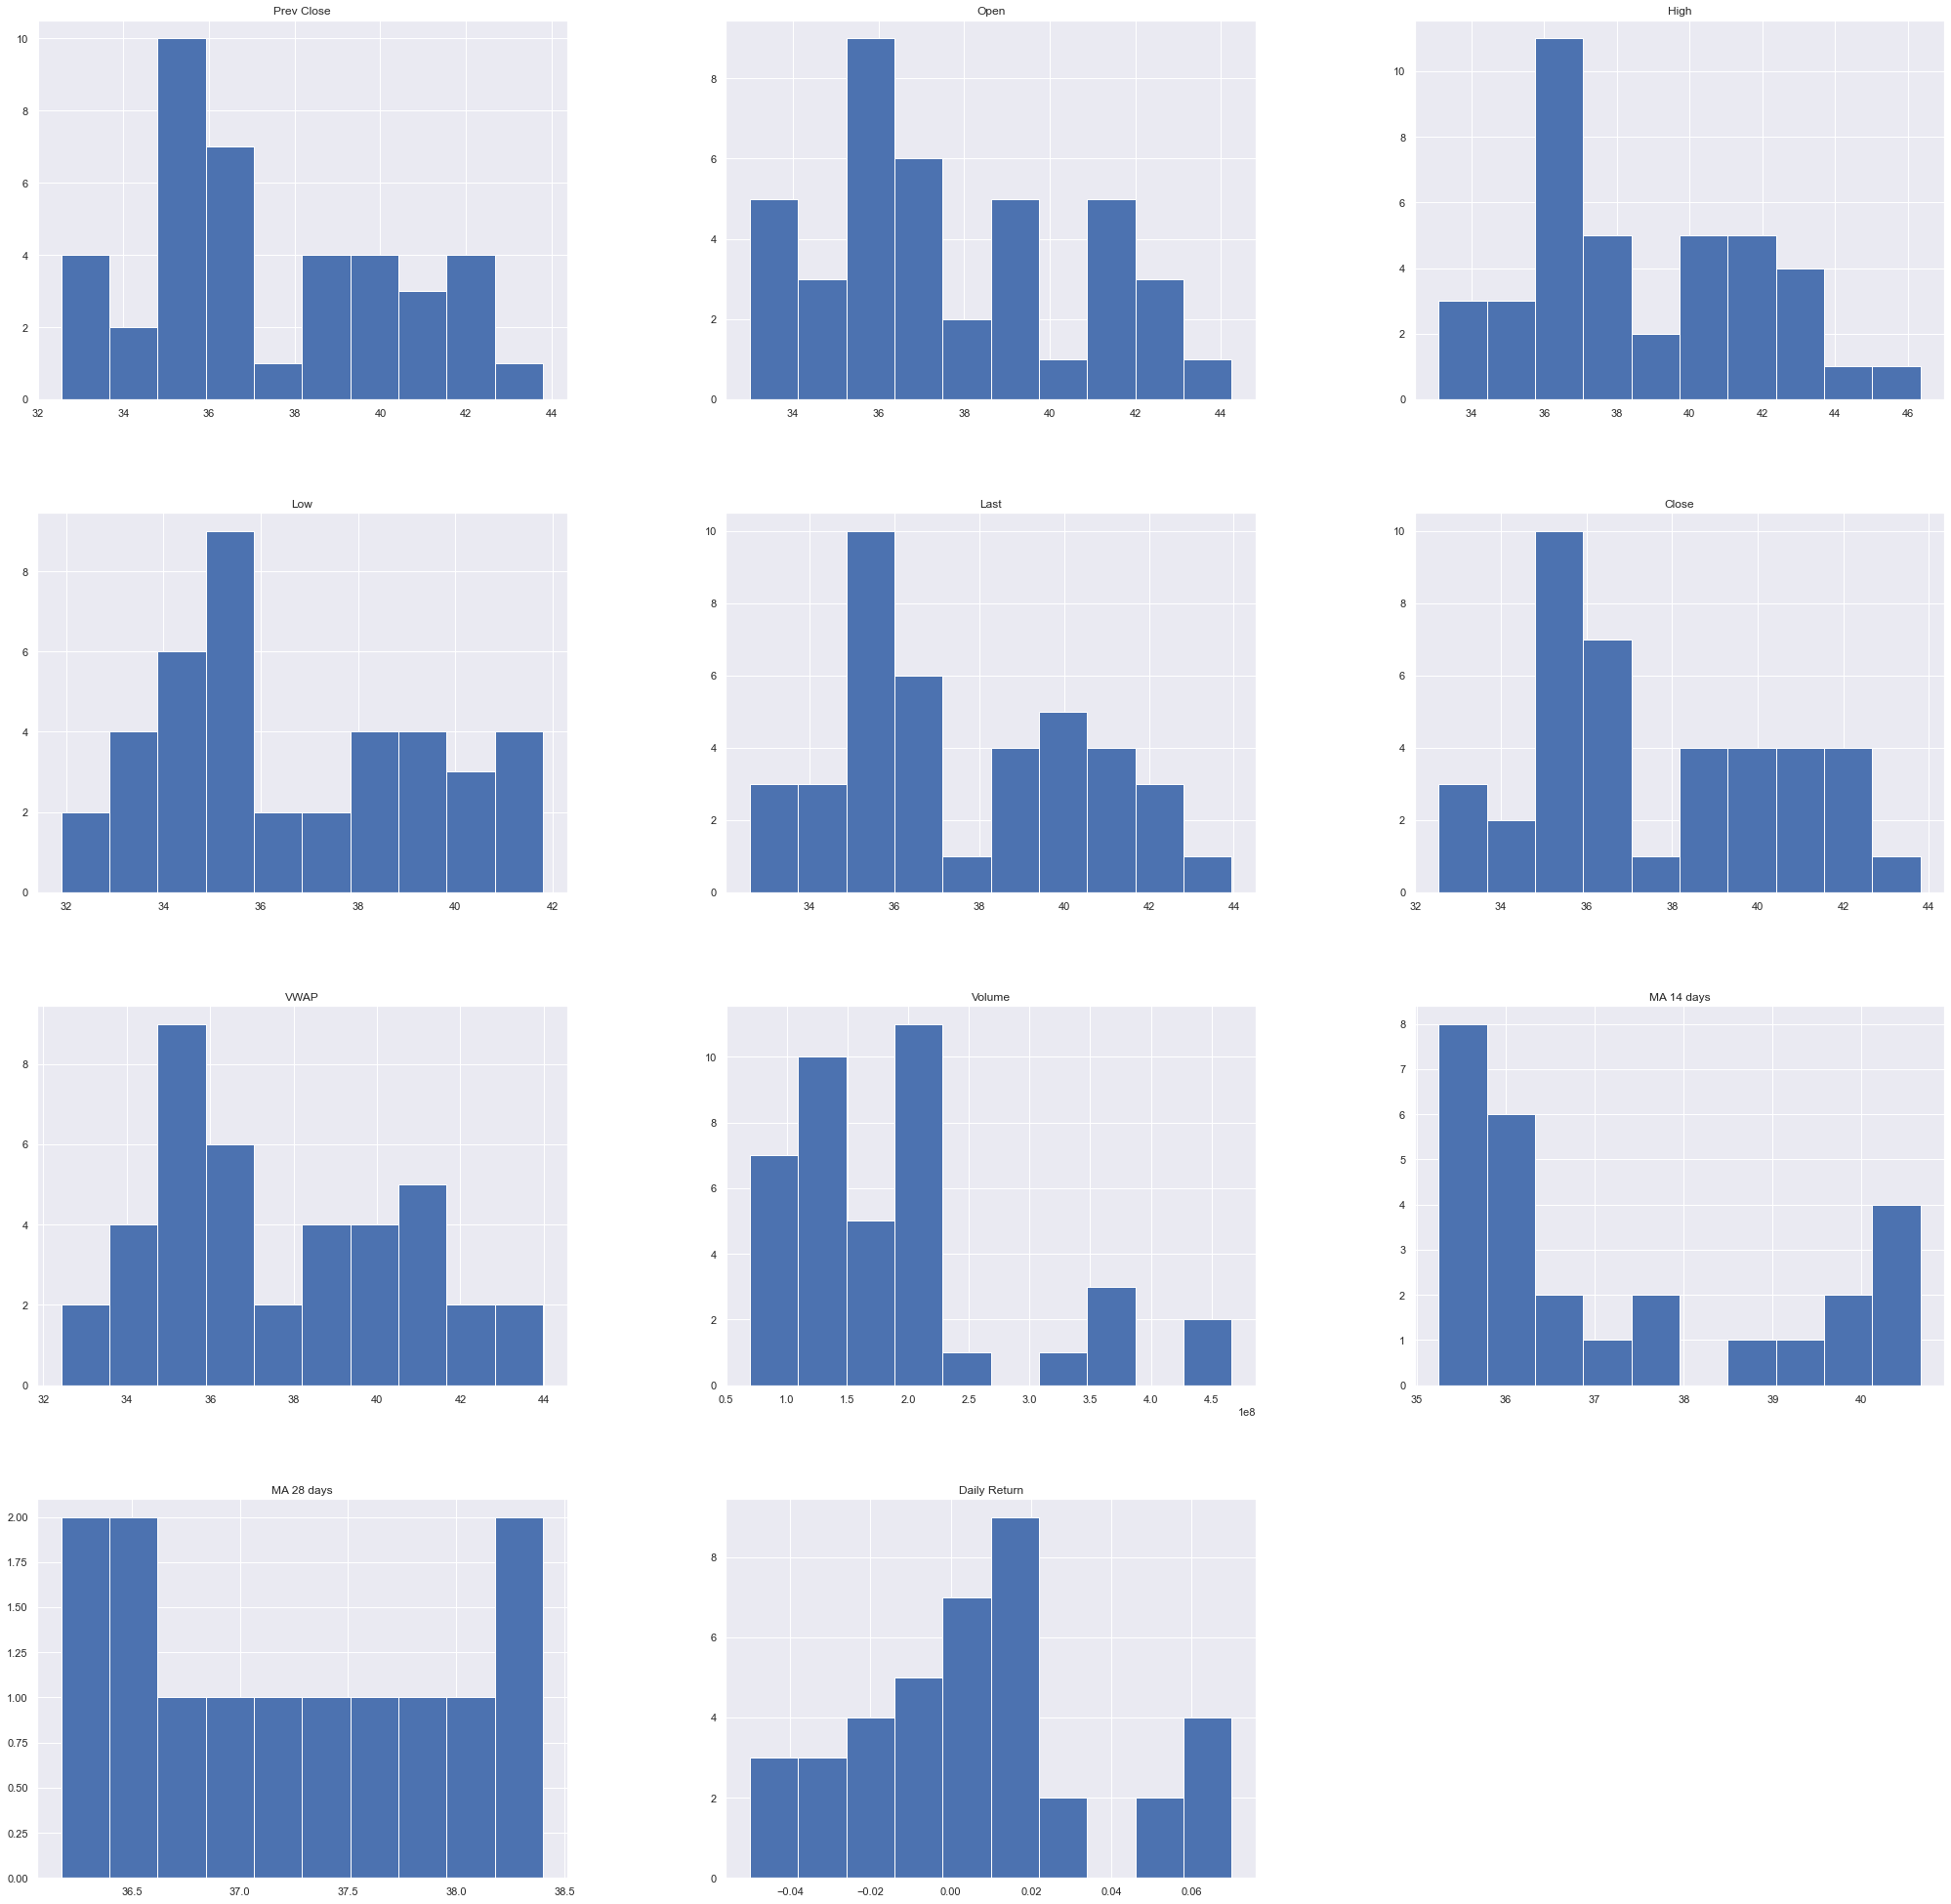

In [28]:
data.hist(figsize = (35,35))
plt.show()